# Load and explores a downloaded '.nc' file with XARRAY
# Separates a time series

https://data.marine.copernicus.eu/product/WIND_GLO_WIND_L4_REP_OBSERVATIONS_012_006/download

In [2]:
import xarray as xr
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import pickle

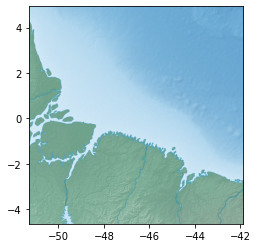

<AxesSubplot:>

In [14]:
# load a base map for visual reference! Exported as geotiff from QGIS

mapa_path = r'd:\ShapeFiles\\'
mapa_name = 'Plataforma_para.tif'

mapa = rasterio.open(mapa_path + mapa_name)
show(mapa)

In [4]:
# Dados descarregados do CMEMS diretamente pelo site

ds_name = 'CERSAT-GLO-BLENDED_WIND_L4_REP-V6-OBS_FULL_TIME_SERIE_1668714770670.nc'

ds = xr.open_dataset(ds_name, engine='netcdf4')

In [4]:
# ds_name = 'wind.nc'
# ds_path = r'd:\CMEMS_Copernicus\data\\'

# ds = xr.open_dataset(ds_path+ds_name, engine='netcdf4')

In [5]:
# explores the content of the 'dataset'
# clicking on the icons at the right side (paper sheet and disk stack) pops up addicional information!

ds

<xarray.Dataset>
Dimensions:             (lat: 21, lon: 29, time: 4384)
Coordinates:
  * lon                 (lon) float32 -50.0 -49.75 -49.5 ... -43.5 -43.25 -43.0
  * time                (time) datetime64[ns] 2015-01-01 ... 2017-12-31T18:00:00
  * lat                 (lat) float32 -3.0 -2.75 -2.5 -2.25 ... 1.5 1.75 2.0
Data variables:
    northward_wind      (time, lat, lon) float64 ...
    sampling_length     (time, lat, lon) float32 ...
    eastward_wind_rms   (time, lat, lon) float64 ...
    northward_wind_rms  (time, lat, lon) float64 ...
    eastward_wind       (time, lat, lon) float64 ...
    surface_type        (time, lat, lon) float32 ...
Attributes: (12/72)
    Conventions:                                    CF-1.7, ACDD-1.3, ISO 8601
    FROM_ORIGINAL_FILE__netcdf_version_id:          4.6.1 of Sep  8 2018 17:2...
    date_created:                                   2020-12-03T15:00:13
    date_modified:                                  2020-12-03T15:00:13
    id:                                             WIND_GLO_WIND_L4_REP_OBSE...
    naming_authority:                               fr.ifremer.cersat
    ...                                             ...
    publisher_institution:                          CMEMS
    scientific_support_contact:                     Abderrahim.Bentamy@ifreme...
    source_data:                                     
    technical_support_contact:                      cersat@ifremer.fr
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...
    comment:

In [6]:
# getting the content of the fields of longitude and latitude and making a mesh 

lon = ds['lon'].data
lat = ds['lat'].data

lonlon, latlat = np.meshgrid(lon, lat)

In [7]:
print(lon)
print(lat)

[-50.   -49.75 -49.5  -49.25 -49.   -48.75 -48.5  -48.25 -48.   -47.75
 -47.5  -47.25 -47.   -46.75 -46.5  -46.25 -46.   -45.75 -45.5  -45.25
 -45.   -44.75 -44.5  -44.25 -44.   -43.75 -43.5  -43.25 -43.  ]
[-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.  ]


In [8]:
# positions of the ADCP and meteorological station (Bragança, PA)
adcp_x = -46.564 
adcp_y = -0.672

met_x = -46.6037 
met_y = -0.8301

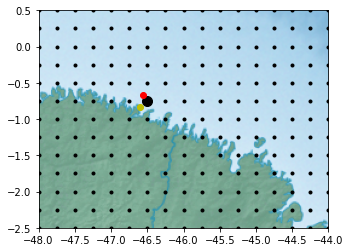

In [9]:
fig, ax = plt.subplots()

# indexes of the selected point find out by trying & error!
li, co = 9, 14

show(mapa, ax=ax)
ax.plot(lonlon, latlat, 'k.')
ax.plot(lonlon[li, co], latlat[li, co], 'ko', ms = 10)
ax.plot(adcp_x, adcp_y, 'ro')
ax.plot(met_x, met_y, 'yo')
ax.set_xlim(-48, -44)
ax.set_ylim(-2.5, .5)
plt.show()

In [49]:
print(lonlon[li, co], latlat[li, co])

-46.5 -0.75


In [10]:
# get the time and the wind components

time = ds['time'].data

u = ds['northward_wind'].data
v = ds['eastward_wind'].data

print(time.shape, u.shape)

(4384,) (4384, 21, 29)


In [11]:
# separated the wind data only for the selected mesh point
us = u[:, li, co]
vs = v[:, li, co]

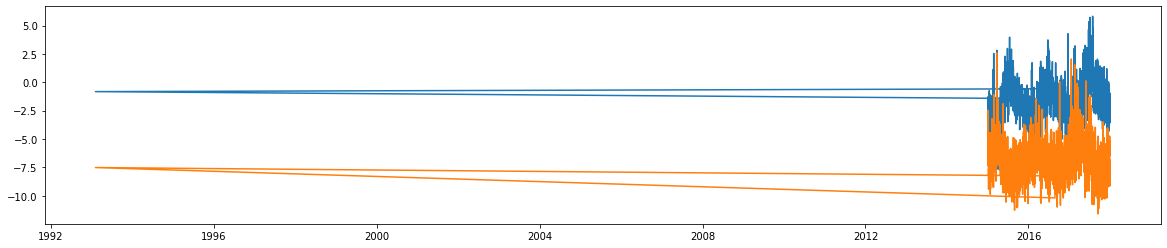

In [12]:
plt.figure(figsize=(20, 4))
plt.plot(time, us)
plt.plot(time, vs)

In [13]:
# fix the flaw in the time, interpolating!

# datetime to float
time_n = mdates.date2num(time)
# find the problematic data index
i = np.array(np.where(time_n < mdates.date2num(datetime.datetime(2000, 1, 1)))).squeeze()
# interpolates
time_n[i] = (time_n[i-1] + time_n[i+1])/2
# corrected time series
time_c = mdates.num2date(time_n)

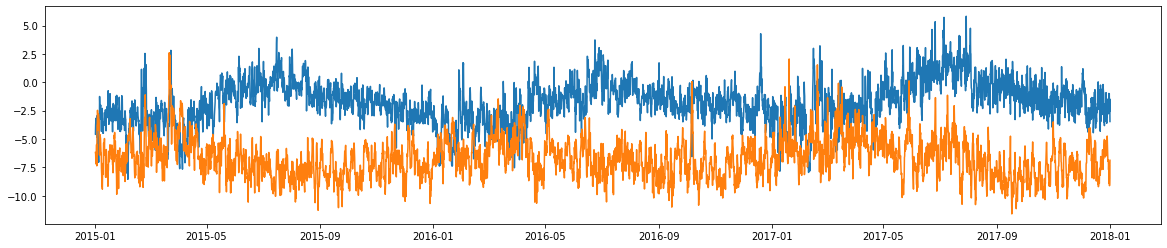

In [37]:
# voilá!
plt.figure(figsize=(20, 4))
plt.plot(time_c, us)
plt.plot(time_c, vs)

In [48]:
# save
hdr = '''
Dados de vento (u, v) a partir do produto Copernicus/CMEMS: Global Ocean Wind L4 Reprocessed 6 hourly Observations

Para o ponto mais próximo da estação meteorológica, e mesmo ponto da malha do ERA5

lista = [hdr, tempo, u, v]
'''
# j = [hdr, time_c, us, vs]
# with open('Vento_satelite_CMEMS_Para_2015_2017.pkl', 'wb') as io:
#     pickle.dump(j, io)